In [1]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data),(tt_x,tt_y) = load_data(num_words=500)
x_data.shape

(25000,)

In [2]:
len(x_data[0]),len(x_data[1])

(218, 189)

In [3]:
y_data[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

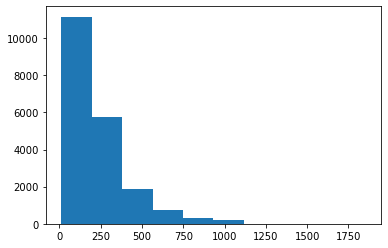

In [5]:
import numpy as np
l= np.array([len(i)for i in t_x])
import matplotlib.pyplot as plt
plt.hist(l)

In [6]:
np.median(l)

178.0

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
s_t_x=pad_sequences(t_x,maxlen=100)

In [8]:
s_t_x.shape

(20000, 100)

In [9]:
s_v_x=pad_sequences(v_x,maxlen=100)

In [10]:
from tensorflow import keras
m=keras.Sequential()

In [11]:
m.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
m.add(keras.layers.Dense(1,activation='sigmoid'))

In [12]:
t_oh=keras.utils.to_categorical(s_t_x)

In [13]:
t_oh.shape

(20000, 100, 500)

In [14]:
v_oh=keras.utils.to_categorical(s_v_x)

In [15]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
hy=m.fit(t_oh,t_y,epochs=100,batch_size=64,validation_data=(v_oh,v_y)
        , callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6949 - accuracy: 0.5191 - val_loss: 0.6892 - val_accuracy: 0.5378
Epoch 2/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6790 - accuracy: 0.5767 - val_loss: 0.6700 - val_accuracy: 0.6096
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6605 - accuracy: 0.6245 - val_loss: 0.6541 - val_accuracy: 0.6342
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6414 - accuracy: 0.6571 - val_loss: 0.6364 - val_accuracy: 0.6636
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6250 - accuracy: 0.6799 - val_loss: 0.6214 - val_accuracy: 0.6824
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6086 - accuracy: 0.6982 - val_loss: 0.6074 - val_accuracy: 0.6920
Epoch 7/100
313/313 [==============================] - 5s 14ms/step - loss: 0.5915 - accuracy: 0.7151 - val_loss: 0.5918 - val_accuracy:

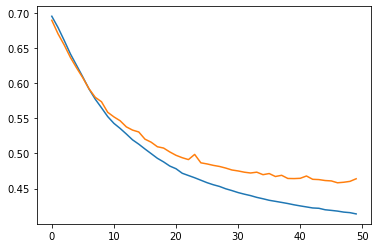

In [17]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [18]:
m1=keras.Sequential()
m1.add(keras.layers.Embedding(500,16,input_length=100))
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1,activation='sigmoid'))
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_emd.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
hy1=m1.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y)
        , callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6889 - accuracy: 0.5456 - val_loss: 0.6782 - val_accuracy: 0.5858
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6604 - accuracy: 0.6460 - val_loss: 0.6536 - val_accuracy: 0.6570
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6344 - accuracy: 0.6950 - val_loss: 0.6317 - val_accuracy: 0.6928
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6096 - accuracy: 0.7260 - val_loss: 0.6114 - val_accuracy: 0.7092
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5861 - accuracy: 0.7460 - val_loss: 0.5875 - val_accuracy: 0.7330
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5652 - accuracy: 0.7581 - val_loss: 0.5696 - val_accuracy: 0.7458
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5461 - accuracy: 0.7691 - val_loss: 0.5578 - val_accuracy: 0.7456

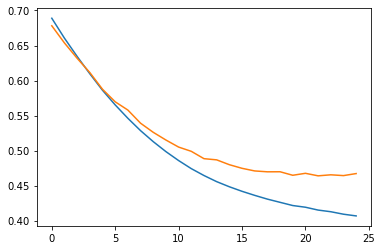

In [19]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])

In [20]:
(x_data,y_data),(tt_x,tt_y) = load_data(num_words=500)
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [21]:
s_t_x=pad_sequences(t_x,maxlen=100)
s_v_x=pad_sequences(v_x,maxlen=100)

In [22]:
m2=keras.Sequential()
m2.add(keras.layers.Embedding(500,16,input_length=100))
m2.add(keras.layers.LSTM(8,dropout=0.3))
m2.add(keras.layers.Dense(1,activation='sigmoid'))

In [23]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m2.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
hy2=m2.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y)
        , callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 7s 17ms/step - loss: 0.6922 - accuracy: 0.5350 - val_loss: 0.6913 - val_accuracy: 0.5782
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6891 - accuracy: 0.6032 - val_loss: 0.6871 - val_accuracy: 0.6326
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6818 - accuracy: 0.6445 - val_loss: 0.6763 - val_accuracy: 0.6528
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6524 - accuracy: 0.6723 - val_loss: 0.6147 - val_accuracy: 0.7042
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5877 - accuracy: 0.7225 - val_loss: 0.5737 - val_accuracy: 0.7420
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5613 - accuracy: 0.7427 - val_loss: 0.5515 - val_accuracy: 0.7464
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5405 - accuracy: 0.7562 - val_loss: 0.5336 - val_accuracy:

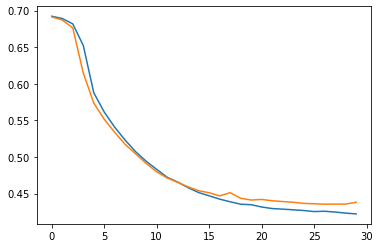

In [24]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [25]:
m3=keras.Sequential()
m3.add(keras.layers.Embedding(500,16,input_length=100))
m3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
m3.add(keras.layers.LSTM(8,dropout=0.3))
m3.add(keras.layers.Dense(1,activation='sigmoid'))

In [26]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m3.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM_M.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
hy3=m3.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_y)
        , callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 12s 32ms/step - loss: 0.6927 - accuracy: 0.5407 - val_loss: 0.6921 - val_accuracy: 0.6024
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6909 - accuracy: 0.5997 - val_loss: 0.6888 - val_accuracy: 0.6388
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6834 - accuracy: 0.6381 - val_loss: 0.6735 - val_accuracy: 0.6608
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6417 - accuracy: 0.6750 - val_loss: 0.5885 - val_accuracy: 0.7120
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5546 - accuracy: 0.7290 - val_loss: 0.5274 - val_accuracy: 0.7398
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5170 - accuracy: 0.7545 - val_loss: 0.5015 - val_accuracy: 0.7604
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4995 - accuracy: 0.7637 - val_loss: 0.4875 - val_ac

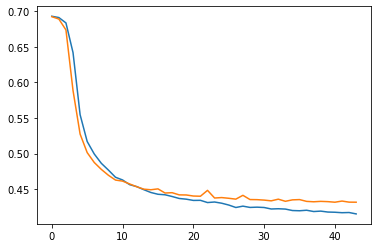

In [27]:
plt.plot(hy3.history['loss'])
plt.plot(hy3.history['val_loss'])

In [28]:
m4 = keras.Sequential()
m4.add(keras.layers.Embedding(500, 16, input_length = 100))
m4.add(keras.layers.GRU(8, dropout = 0.3, return_sequences = True))
m4.add(keras.layers.GRU(8, dropout = 0.3))
m4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [29]:
ot = keras.optimizers.RMSprop(learning_rate = 1e-4)
m4.compile(optimizer = ot, loss = 'binary_crossentropy', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_GRU_M.h5', save_best_only = True)
e_stopping = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
hy4 = m4.fit(s_t_x, t_y, epochs = 100, batch_size = 64, validation_data = (s_v_x, v_y), callbacks=[ck_p, e_stopping])

Epoch 1/100
313/313 [==============================] - 13s 36ms/step - loss: 0.6928 - accuracy: 0.5174 - val_loss: 0.6923 - val_accuracy: 0.5400
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6914 - accuracy: 0.5599 - val_loss: 0.6905 - val_accuracy: 0.5768
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6882 - accuracy: 0.5993 - val_loss: 0.6862 - val_accuracy: 0.6060
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6809 - accuracy: 0.6220 - val_loss: 0.6755 - val_accuracy: 0.6330
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6638 - accuracy: 0.6442 - val_loss: 0.6526 - val_accuracy: 0.6516
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6323 - accuracy: 0.6628 - val_loss: 0.6150 - val_accuracy: 0.6714
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5967 - accuracy: 0.6842 - val_loss: 0.5826 - val_ac

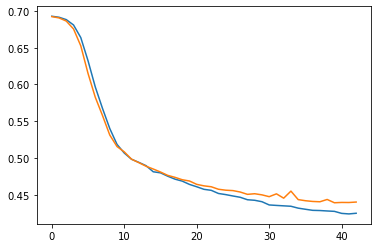

In [30]:
plt.plot(hy4.history['loss'])
plt.plot(hy4.history['val_loss'])